# Created by Purnawirman October 8th 2015
## Twitter data for "Sports" related classification

In [ ]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup

import json

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [7]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [107]:
## Cant share my keys in github
## make a text file, four lines, each consist of the api key from twitter

twitter_key =[]
with open('twitter_key.txt') as fp:
    consumer_key =  fp.readline()
    consumer_secret = fp.readline()
    access_token = fp.readline()
    access_secret = fp.readline()

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth)

In [109]:
ls -l

total 851288
-rw-r--r--  1 purnawirman  staff      55093 Oct  9 16:49 Untitled.ipynb
-rw-r--r--  1 purnawirman  staff     463389 Oct  7 16:26 data_scraping_transcript-Copy1.ipynb
-rwxr-xr-x  1 purnawirman  staff     462068 Oct  5 20:31 data_scraping_transcript.ipynb*
drwxr-xr-x  8 purnawirman  staff        272 Oct  5 17:30 images/
-rw-r--r--  1 purnawirman  staff        865 Oct  8 10:56 non_sports_stream.py
-rw-r--r--  1 purnawirman  staff   74913060 Oct  8 11:07 non_sports_stream.txt
-rw-r--r--  1 purnawirman  staff  199762680 Oct  8 11:34 non_sports_stream2.txt
-rw-r--r--  1 purnawirman  staff     336653 Oct  8 11:37 output.txt
-rw-r--r--  1 purnawirman  staff        925 Oct  8 10:59 sports_stream.py
-rw-r--r--  1 purnawirman  staff   40122706 Oct  8 11:07 sports_stream.txt
-rw-r--r--  1 purnawirman  staff  112437229 Oct  8 11:34 sports_stream2.txt
-rw-r--r--  1 purnawirman  staff    7274496 Oct  8 11:00 test.txt
-rw-r--r--  1 purnawirman  staff        175 Oct  9 16:43 twitter_key.tx


### Stream real time twitter data with tags (see the sports_stream.py and non_sports_stream.py for the tags)

In [82]:
## The following streaming SHOULD be run on the terminal, and it requires ctrl C to interrupt the streaming.
## If not stopped/interrupted, it will run indefinitely.

# !python sports_stream.py > output_1.txt
# !python non_sports_stream.py > output_0.txt

!ls

Untitled.ipynb                       non_sports_stream2.txt
data_scraping_transcript-Copy1.ipynb output.txt
data_scraping_transcript.ipynb       sports_stream.py
images                               sports_stream.txt
non_sports_stream.py                 sports_stream2.txt
non_sports_stream.txt                test.txt


In [68]:
tweets_data_path = 'sports_stream.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if 'text' in tweet.keys():
            tweets_data.append(tweet)
    except:
        continue

In [83]:
print "Total number of rows: {} tweets.".format(len(tweets_data))
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets.head()

Total number of rows: 8970 tweets.


,text,lang,country
0,RT @LFletcher59: Great perspective on an idiot...,en,None
1,"RT @AnthonyDiMoro: I love October. Halloween, ...",en,None
2,RT @AuburnSwimming: Swimming and diving opens ...,en,None
3,Me ha gustado un vídeo de @YouTube de @ernesin...,es,None
4,My latest episode is now available! Listen to ...,en,None


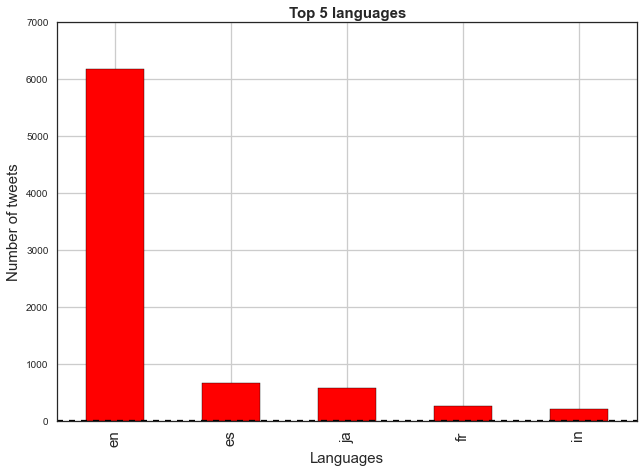

In [70]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

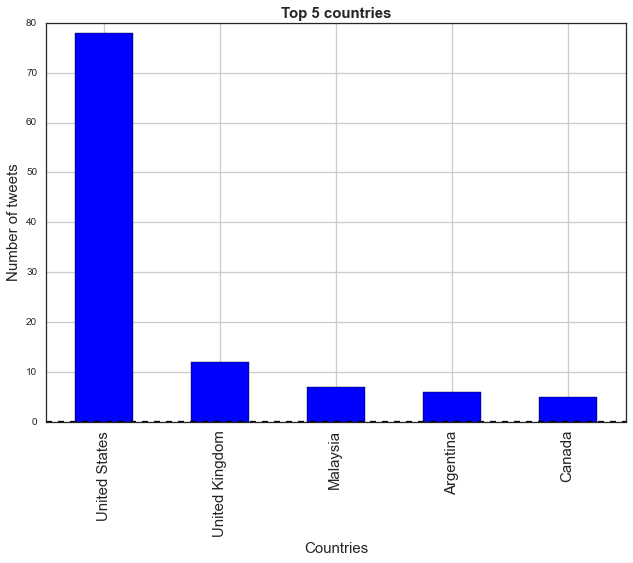

In [71]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

#### Install nltk library, and remember to download nltk - models- punkt, look at the following site to check if encounter lookuperror:
http://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load

In [91]:
from nltk.tokenize import word_tokenize
import re

sample_tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(sample_tweet))


['RT', '@', 'marcobonzanini', ':', 'just', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [92]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
print(preprocess(sample_tweet))

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [94]:
import onlineldavb
